<a href="https://colab.research.google.com/github/s-sakshi9317/CreateREACT/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas-datareader
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf #alternate

In [ ]:
start = '2011-01-01'
end = '2022-12-31'

df = yf.download('TSLA', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1.789333,1.800000,1.726667,1.774667,1.774667,19245000
2011-01-04,1.777333,1.796667,1.734667,1.778000,1.778000,17811000
2011-01-05,1.765333,1.793333,1.746000,1.788667,1.788667,21700500
2011-01-06,1.788667,1.866667,1.787333,1.858667,1.858667,30918000
2011-01-07,1.866667,1.905333,1.860000,1.882667,1.882667,33718500


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300


In [ ]:
# df = df.reset_index()
df = df.drop(['index'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.789333,1.800000,1.726667,1.774667,19245000
1,1.777333,1.796667,1.734667,1.778000,17811000
2,1.765333,1.793333,1.746000,1.788667,21700500
3,1.788667,1.866667,1.787333,1.858667,30918000
4,1.866667,1.905333,1.860000,1.882667,33718500


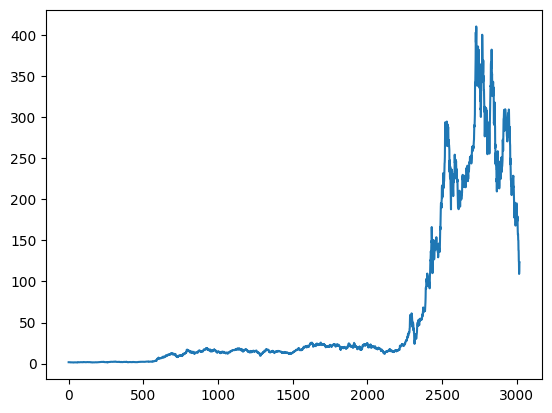

In [ ]:
plt.plot(df.Close)

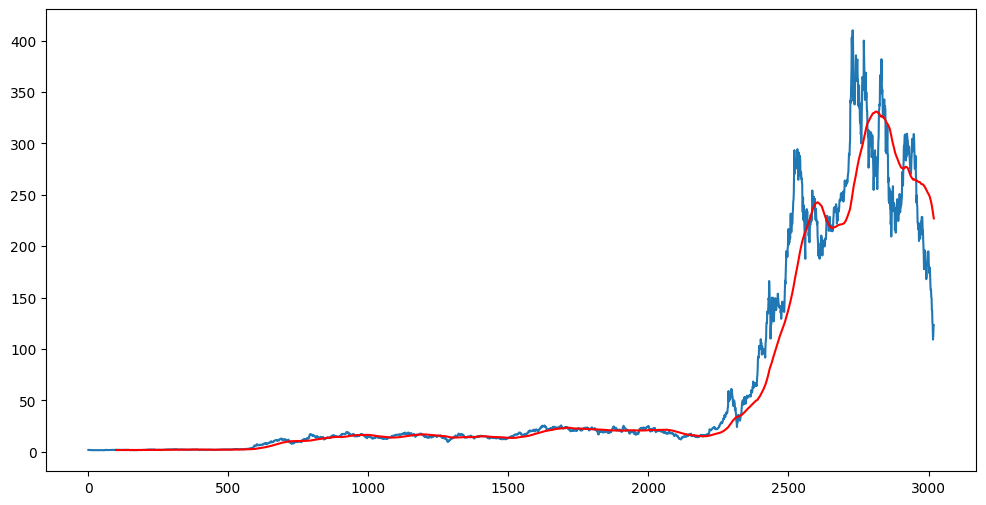

In [ ]:
ma100 = df.Close.rolling(100).mean()
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

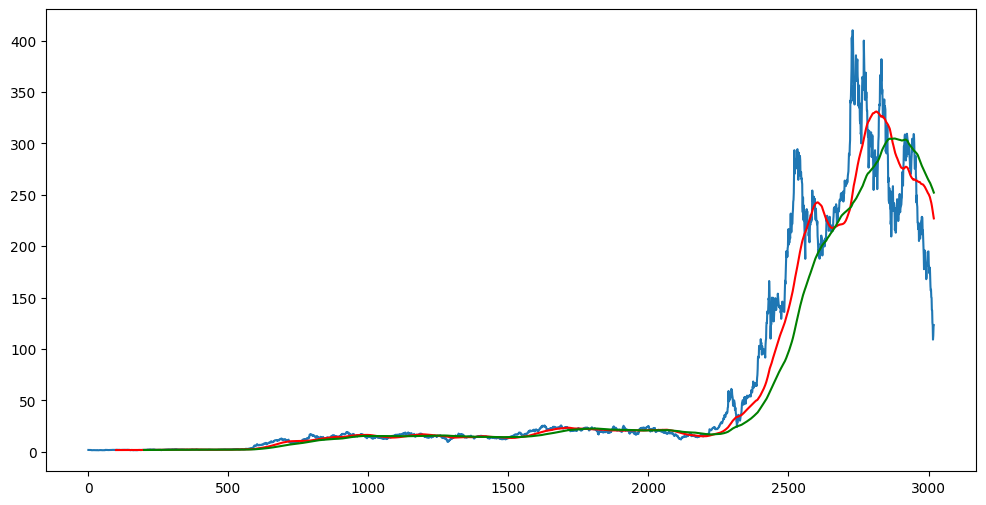

In [ ]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(3020, 5)

In [ ]:
# Splitting data for training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [ ]:
print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(906, 1)


In [ ]:
from  sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array


array([[0.01318944],
       [0.0133271 ],
       [0.01376768],
       ...,
       [0.46479609],
       [0.45948177],
       [0.46267587]])

In [ ]:
x_train =[]
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

ML MODEL

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
# model.build()
model.add(Dense(units = 1))

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_44 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_47 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_45 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_48 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_46 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_49 (LSTM)              (None, 120)             

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 25s 299ms/step - loss: 0.0562
Epoch 2/50
63/63 [==============================] - 21s 330ms/step - loss: 0.0151
Epoch 3/50
63/63 [==============================] - 19s 297ms/step - loss: 0.0112
Epoch 4/50
63/63 [==============================] - 22s 355ms/step - loss: 0.0113
Epoch 5/50
63/63 [==============================] - 19s 299ms/step - loss: 0.0097
Epoch 6/50
63/63 [==============================] - 21s 335ms/step - loss: 0.0100
Epoch 7/50
63/63 [==============================] - 20s 317ms/step - loss: 0.0100
Epoch 8/50
63/63 [==============================] - 18s 294ms/step - loss: 0.0087
Epoch 9/50
63/63 [==============================] - 20s 323ms/step - loss: 0.0085
Epoch 10/50
63/63 [==============================] - 18s 293ms/step - loss: 0.0087
Epoch 11/50
63/63 [==============================] - 21s 331ms/step - loss: 0.0079
Epoch 12/50
63/63 [==============================] - 21s 327ms/step - loss: 0.0077
Epoch 13/50
6

In [ ]:
model.save('keras_model.keras')

In [ ]:
data_testing.head()

,Close
2114,12.548000
2115,12.344000
2116,11.931333
2117,12.906667
2118,13.106000


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
# Use the concat function to combine DataFrames
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

,Close
0,21.179333
1,22.330667
2,22.356667
3,22.568666
4,22.997999


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data

array([[0.02323392],
       [0.02612644],
       [0.02619176],
       ...,
       [0.25318813],
       [0.27607536],
       [0.27949211]])

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape,y_test.shape)

(906, 100, 1) (906,)


In [ ]:
# Make Predictions

y_predicted = model.predict(x_test)

29/29 [==============================] - 3s 88ms/step


In [ ]:
y_predicted.shape

(906, 1)

In [ ]:
scaler.scale_

array([0.00251232])

In [ ]:
scale_factor = 1/0.00251232
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

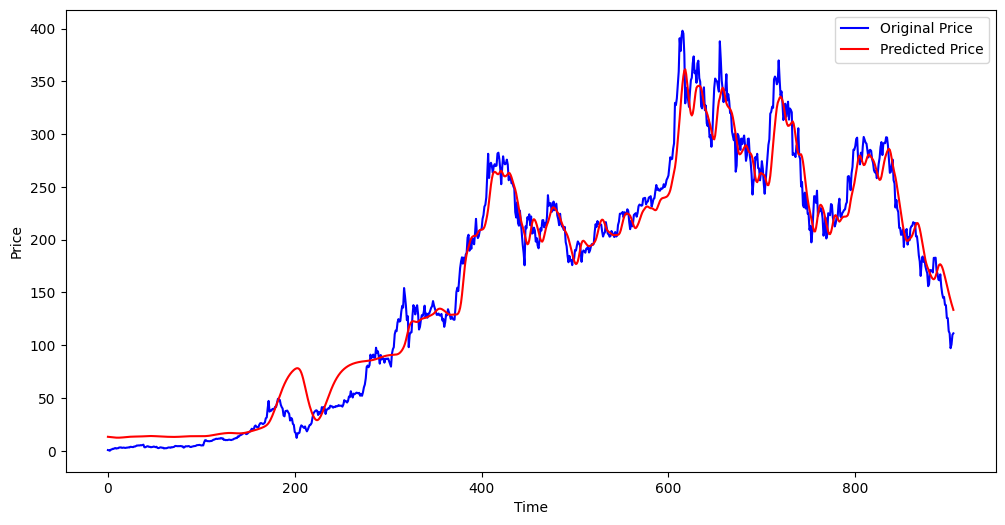

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()